In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [6]:
# Load the dataset from a CSV file
df = pd.read_csv('/content/sales_data_sample.csv',  encoding='latin-1')

In [9]:
# Display the first few rows of the dataset
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
# Check for missing data
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [16]:
# Step 1: Handle Missing Data

# Address missing values in ADDRESSLINE2: Fill with a placeholder
df['ADDRESSLINE2'].fillna('No Address', inplace=True)

# Address missing values in STATE: Replace with the mode (most frequent state)
imputer_mode = SimpleImputer(strategy='most_frequent')
df['STATE'] = imputer_mode.fit_transform(df[['STATE']]).flatten()

# Address missing values in POSTALCODE: Replace with the mode
df['POSTALCODE'] = imputer_mode.fit_transform(df[['POSTALCODE']]).flatten()

# Address missing values in TERRITORY: Replace with the mode
df['TERRITORY'] = imputer_mode.fit_transform(df[['TERRITORY']]).flatten()

# Display the dataset after handling missing data
print("\nDataset After Handling Missing Data:\n", df.head())



Dataset After Handling Missing Data:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue    No Address            NYC    NY   
1      

In [17]:
# Step 2: Perform One-Hot Encoding

# Apply one-hot encoding to the categorical columns like 'STATUS', 'PRODUCTLINE', 'TERRITORY', 'DEALSIZE'
df_encoded = pd.get_dummies(df, columns=['STATUS', 'PRODUCTLINE', 'TERRITORY', 'DEALSIZE'], drop_first=True)

# Display the dataset after one-hot encoding
print("\nDataset After One-Hot Encoding:\n", df_encoded.head())


Dataset After One-Hot Encoding:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE  QTR_ID  MONTH_ID  YEAR_ID  MSRP  ...  \
0   2/24/2003 0:00       1         2     2003    95  ...   
1    5/7/2003 0:00       2         5     2003    95  ...   
2    7/1/2003 0:00       3         7     2003    95  ...   
3   8/25/2003 0:00       3         8     2003    95  ...   
4  10/10/2003 0:00       4        10     2003    95  ...   

  PRODUCTLINE_Motorcycles PRODUCTLINE_Planes PRODUCTLINE_Ships  \
0                    True              False             False   
1                    True              F

In [19]:

# Save the modified dataset to a new CSV file
df_encoded.to_csv('sales_data_one_hot_encoded.csv', index=False)
print("\nThe dataset has been saved as 'sales_data_one_hot_encoded.csv'.")


The dataset has been saved as 'sales_data_one_hot_encoded.csv'.


TASK2_LAB1_PART2

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('sales_data_one_hot_encoded.csv')

In [22]:
# Select numerical columns for scaling
numerical_features = ['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP']

In [24]:
print("Original Dataset (First 5 Rows):\n", df[numerical_features].head())

Original Dataset (First 5 Rows):
      SALES  QUANTITYORDERED  PRICEEACH  MSRP
0  2871.00               30      95.70    95
1  2765.90               34      81.35    95
2  3884.34               41      94.74    95
3  3746.70               45      83.26    95
4  5205.27               49     100.00    95


In [25]:
# Step 1: StandardScaler

scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(df[numerical_features])

# Convert the scaled data back to a DataFrame for easier visualization
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=numerical_features)

In [26]:
# Step 2: MinMaxScaler

scaler_minmax = MinMaxScaler()
df_minmax_scaled = scaler_minmax.fit_transform(df[numerical_features])

# Convert the scaled data back to a DataFrame
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=numerical_features)

Visualize the Features Before and After Scaling

(array([1, 2, 3, 4]),
 [Text(1, 0, 'SALES'),
  Text(2, 0, 'QUANTITYORDERED'),
  Text(3, 0, 'PRICEEACH'),
  Text(4, 0, 'MSRP')])

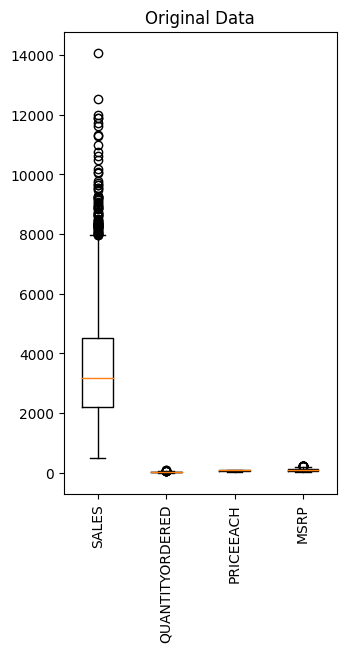

In [27]:
# Plot the features before scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Data")
plt.boxplot(df[numerical_features], labels=numerical_features)
plt.xticks(rotation=90)

(array([1, 2, 3, 4]),
 [Text(1, 0, 'SALES'),
  Text(2, 0, 'QUANTITYORDERED'),
  Text(3, 0, 'PRICEEACH'),
  Text(4, 0, 'MSRP')])

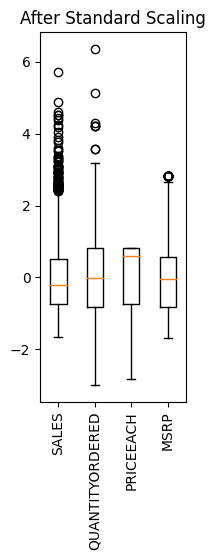

In [28]:
# Plot the features after StandardScaler
plt.subplot(1, 3, 2)
plt.title("After Standard Scaling")
plt.boxplot(df_standard_scaled, labels=numerical_features)
plt.xticks(rotation=90)

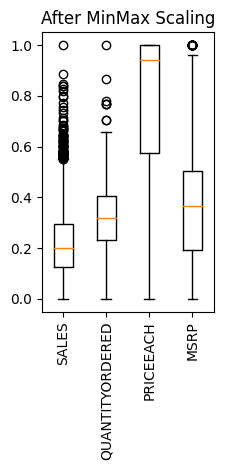

In [29]:
# Plot the features after MinMaxScaler
plt.subplot(1, 3, 3)
plt.title("After MinMax Scaling")
plt.boxplot(df_minmax_scaled, labels=numerical_features)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##When to Use:

###StandardScaler:

1) Use when features are normally distributed or have similar distributions.
2) Particularly useful for algorithms like logistic regression, linear regression, SVM, and PCA, which assume normally distributed data or are sensitive to the scale of the input features.

###MinMaxScaler:

1) Use when the features do not follow a normal distribution or when you need to bound the values between a specific range (e.g., [0, 1]).
2) Often used for algorithms that do not assume a normal distribution, such as neural networks and k-nearest neighbors (KNN), or when the data contains outliers that would skew the results of StandardScaler.